## Overview

Your client, a Portuguese banking institution, ran a marketing campaign to convince potential customers to invest in a bank term deposit scheme. 
The marketing campaigns were based on phone calls. Often, the same customer was contacted more than once through phone, in order to assess if they would want to subscribe to the bank term deposit or not. You have to perform the marketing analysis of the data generated by this campaign

In [0]:
import os
import datetime
import pandas as pd
import numpy as np
import pyspark.sql.functions as F
from pyspark.sql.functions import col
import plotly
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from pyspark.sql import DataFrame
from datetime import datetime, date

In [0]:
# File location and type
file_location = "/FileStore/tables/Project_1_dataset_bank_full__2_-1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [0]:
df.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
age| job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome| y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
 58| management| married| tertiary| no| 2143| yes| no|unknown| 5| may| 261| 1| -1| 0| unknown| no|
 44| technician| single|secondary| no| 29| yes| no|unknown| 5| may| 151| 1| -1| 0| unknown| no|
 33|entrepreneur| married|secondary| no| 2| yes| yes|unknown| 5| may| 76| 1| -1| 0| unknown| no|
 47| blue-collar| married| unknown| no| 1506| yes| no|unknown| 5| may| 92| 1| -1| 0| unknown| no|
 33| unknown| single| unknown| no| 1| no| no|unknown| 5| may| 198| 1| -1| 0| unknown| no|
 35| management| married| tertiary| no| 231| yes| no|unknown| 5| may| 139| 1| -1| 0| unknown| no|
 28| management| single| tertiary| no| 447| yes| yes|unknown| 5| may| 217| 1| -1| 0| unknown| no|
 42|entrepreneur|divorced| tertiary| yes| 2| yes| no|unknown| 5| may| 380| 1| -1| 0| unknown| no|
 58| retired| married| primary| no| 121| yes| no|unknown| 5| may| 50| 1| -1| 0| unknown| no|
 43| technician| single|secondary| no| 593| yes| no|unknown| 5| may| 55| 1| -1| 0| unknown| no|
 41| admin.|divorced|secondary| no| 270| yes| no|unknown| 5| may| 222| 1| -1| 0| unknown| no|
 29| admin.| single|secondary| no| 390| yes| no|unknown| 5| may| 137| 1| -1| 0| unknown| no|
 53| technician| married|secondary| no| 6| yes| no|unknown| 5| may| 517| 1| -1| 0| unknown| no|
 58| technician| married| unknown| no| 71| yes| no|unknown| 5| may| 71| 1| -1| 0| unknown| no|
 57| services| married|secondary| no| 162| yes| no|unknown| 5| may| 174| 1| -1| 0| unknown| no|
 51| retired| married| primary| no| 229| yes| no|unknown| 5| may| 353| 1| -1| 0| unknown| no|
 45| admin.| single| unknown| no| 13| yes| no|unknown| 5| may| 98| 1| -1| 0| unknown| no|
 57| blue-collar| married| primary| no| 52| yes| no|unknown| 5| may| 38| 1| -1| 0| unknown| no|
 60| retired| married| primary| no| 60| yes| no|unknown| 5| may| 219| 1| -1| 0| unknown| no|
 33| services| married|secondary| no| 0| yes| no|unknown| 5| may| 54| 1| -1| 0| unknown| no|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
only showing top 20 rows

In [0]:
# Create a view or table

temp_table_name = "dataset_bank"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `dataset_bank`

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "dataset_bank"

# df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

{'svg'} is not supported in Databricks.
Supported formats are png, retina and png2x.

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select count(*) from dataset_bank where y='yes'

count(1)
5289


In [0]:
%sql
select count(*) from dataset_bank

count(1)
45211


In [0]:
#converting to pandas df
df_bank_pd = df.toPandas()

In [0]:
df_bank_pd.head(10)

Out[10]:

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [0]:
df_bank_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 age 45211 non-null object
 1 job 45211 non-null object
 2 marital 45211 non-null object
 3 education 45211 non-null object
 4 default 45211 non-null object
 5 balance 45211 non-null object
 6 housing 45211 non-null object
 7 loan 45211 non-null object
 8 contact 45211 non-null object
 9 day 45211 non-null object
 10 month 45211 non-null object
 11 duration 45211 non-null object
 12 campaign 45211 non-null object
 13 pdays 45211 non-null object
 14 previous 45211 non-null object
 15 poutcome 45211 non-null object
 16 y 45211 non-null object
dtypes: object(17)
memory usage: 5.9+ MB

In [0]:
df_bank_pd["balance"] = pd.to_numeric(df_bank_pd["balance"])

In [0]:
df_bank_pd["age"] = pd.to_numeric(df_bank_pd["age"])

In [0]:
df_bank_pd[["day", "duration", "campaign", "pdays", "previous"]] = df_bank_pd[["day", "duration", "campaign", "pdays", "previous"]].apply(pd.to_numeric)

In [0]:
#round(df_bank_pd[df_bank_pd.y == 'yes'] / len(df_bank_pd),2)

df_bank_yes = df_bank_pd[df_bank_pd.y == 'yes']
df_bank_no = df_bank_pd[df_bank_pd.y == 'no']

#print("Marketing success rate:", df_bank_yes['y'].count() / df_bank_pd['y'].count() * 100)
print("Marketing success rate:", len(df_bank_yes['y']) * 100 / len(df_bank_pd['y']))
print("Marketing failure rate:", len(df_bank_no['y']) * 100 / len(df_bank_pd['y']))

Marketing success rate: 11.698480458295547
Marketing failure rate: 88.30151954170445

In [0]:
df_bank_pd.describe()

Out[16]:

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [0]:
print("Min age of customer:", df_bank_pd['age'].min())
print("Min age of customer:", df_bank_pd['age'].max())
print("Mean age of customer:", df_bank_pd['age'].mean())
print("Meadian age of customer:", df_bank_pd['age'].median())

Min age of customer: 18
Min age of customer: 95
Mean age of customer: 40.93621021432837
Meadian age of customer: 39.0

In [0]:
df_bank_pd['age'].kurt()

Out[18]: 0.3195703759105042

In [0]:
%sql

select min(age), max(age), mean(age) from dataset_bank;

min(age),max(age),mean(CAST(age AS DOUBLE))
18,95,40.93621021432837


In [0]:
print("Average/Mean balance of customers:", df_bank_pd['balance'].mean())
print("Meadian balance of customers:", df_bank_pd['balance'].median())

Average/Mean balance of customers: 1362.2720576850766
Meadian balance of customers: 448.0

In [0]:
%sql

select min(balance), max(balance), mean(balance) as mean, percentile_approx(balance, 0.5) as median from dataset_bank;

min(balance),max(balance),mean,median
-1,9997,1362.2720576850766,448.0


In [0]:
%sql

select marital, y, count(*)
from dataset_bank
group by marital, y
order by y

marital,y,count(1)
divorced,no,4585
single,no,10878
married,no,24459
divorced,yes,622
single,yes,1912
married,yes,2755


Out[20]:

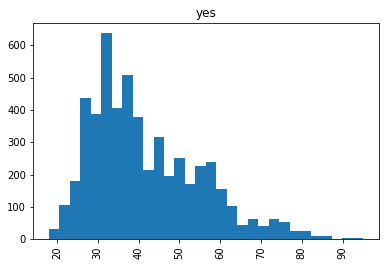

<AxesSubplot:title={'center':'yes'}>

In [0]:
df_bank_yes.hist(column="age",by="y",bins=30)

Out[21]:

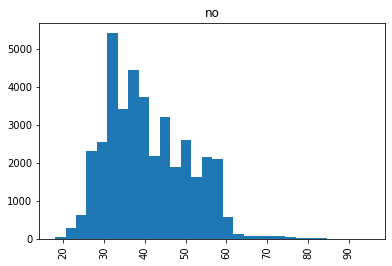

<AxesSubplot:title={'center':'no'}>

In [0]:
df_bank_no.hist(column="age",by="y",bins=30)

Out[23]:

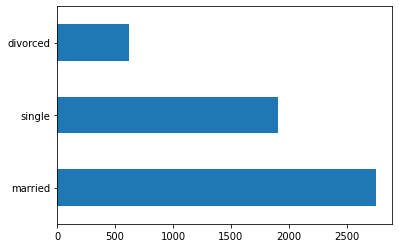

<AxesSubplot:>

In [0]:
df_bank_yes.marital.value_counts().plot(kind='barh') 
#sns.barplot(x='marital',y='y',hue='class',data=df_bank_yes,palette='PuRd',orient = 'h')

Out[25]:

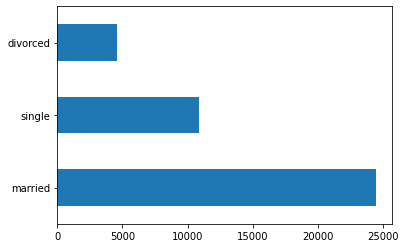

<AxesSubplot:>

In [0]:
df_bank_no.marital.value_counts().plot(kind='barh')
#sns.barplot(x='marital',y='y',hue='class',data=df_bank_no,palette='PuRd',orient = 'h')

Out[26]:

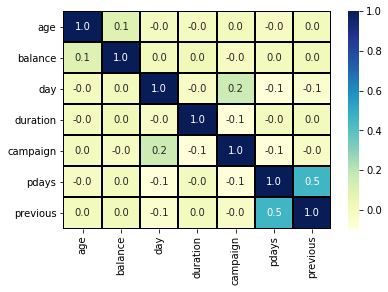

<AxesSubplot:>

In [0]:
corr = df_bank_pd.corr()
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='black',
            annot = True,
            cmap="YlGnBu" 
            )

Feature Engineering

In [0]:
def age_groups(x):
  if x < 30:
    return 'young'
  elif x > 65:
    return 'old'
  else:
    return 'mid'

In [0]:
df_bank_pd['age_cat'] = df_bank_pd['age'].apply(age_groups)

In [0]:
df_bank_pd['poutcome'].unique()

Out[88]: array(['unknown', 'failure', 'other', 'success'], dtype=object)

Out[69]:

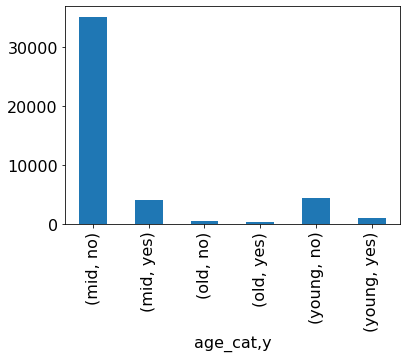

<AxesSubplot:xlabel='age_cat,y'>

In [0]:
df_bank_pd.groupby(['age_cat','y']).size().plot(kind="bar")

In [0]:
df_bank_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39922 entries, 0 to 45210
Data columns (total 18 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 age 39922 non-null int64 
 1 job 39922 non-null object
 2 marital 39922 non-null object
 3 education 39922 non-null object
 4 default 39922 non-null object
 5 balance 39922 non-null int64 
 6 housing 39922 non-null object
 7 loan 39922 non-null object
 8 contact 39922 non-null object
 9 day 39922 non-null int64 
 10 month 39922 non-null object
 11 duration 39922 non-null int64 
 12 campaign 39922 non-null int64 
 13 pdays 39922 non-null int64 
 14 previous 39922 non-null int64 
 15 poutcome 39922 non-null object
 16 y 39922 non-null object
 17 age_cat 39922 non-null object
dtypes: int64(7), object(11)
memory usage: 5.8+ MB

K-means continued in another notebook